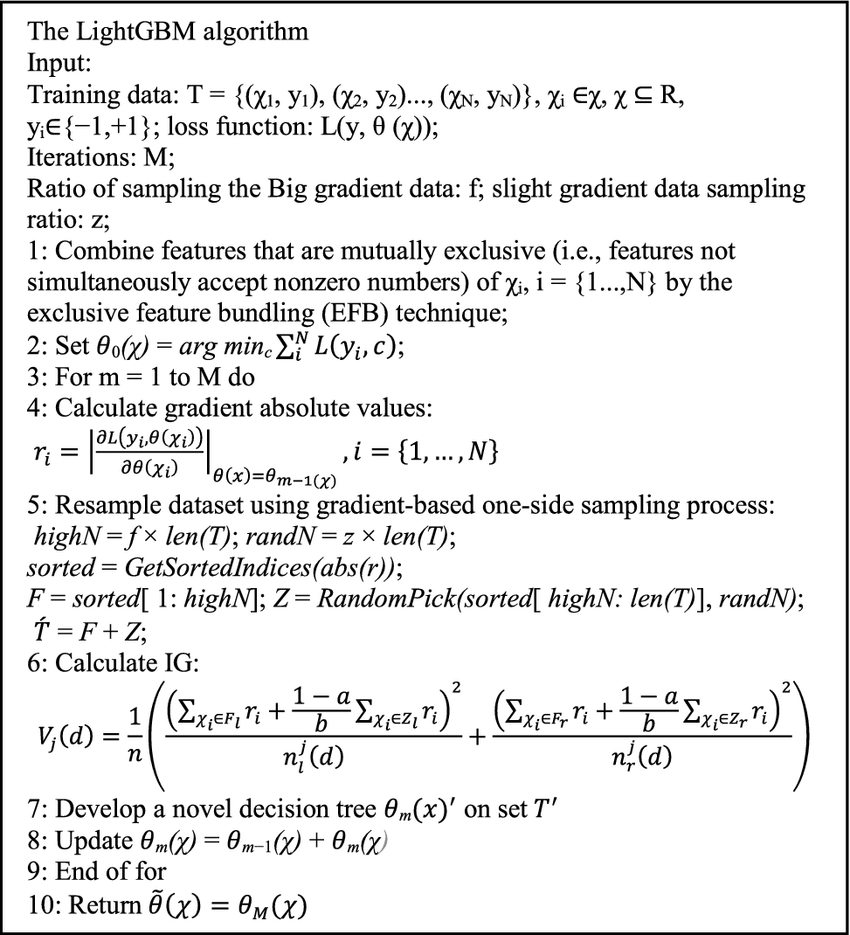

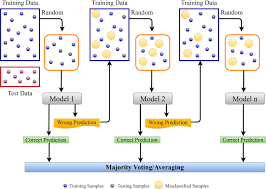

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv(r"C:\Users\arjun\Downloads\diabetes (1).csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
X= df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [9]:
model2 = DecisionTreeClassifier()

model1 = AdaBoostClassifier(estimator=model2,
                           n_estimators=50,learning_rate=1.0)
model1.fit(Xtrain,ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [10]:
model1.score(Xtest,ytest)

0.7272727272727273

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
sk = StandardScaler()
scaled = sk.fit_transform(X)

In [15]:
Xtrain,Xtest,ytrain,ytest=train_test_split(scaled,y,random_state=42,test_size=0.2,stratify=y)

In [16]:
model5 = DecisionTreeClassifier()

model6 = AdaBoostClassifier(estimator=model2,
                           n_estimators=50,learning_rate=1.0)
model6.fit(Xtrain,ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [17]:
model6.score(Xtest,ytest)

0.7207792207792207

In [20]:
cross_val_score(model6,X,y,cv=5).mean()

0.7228079110432052

In [21]:
cross_val_score(model6,X,y,cv=5)

array([0.70779221, 0.66883117, 0.67532468, 0.79084967, 0.71895425])

# Grdient Boost 

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
kmodel = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=5)

In [28]:
kmodel.fit(Xtrain,ytrain)

GradientBoostingClassifier(max_depth=5)

In [29]:
kmodel.score(Xtest,ytest)

0.7597402597402597

# Xg boost

In [30]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 1.6 MB/s eta 0:00:00


In [31]:
from xgboost import XGBClassifier

In [32]:
mgxb = XGBClassifier(n_estimators = 10,max_depth = 5, learning_rate = 0.5,objective='binary:logistic')

In [34]:
mgxb.fit(Xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
mgxb.score(Xtest,ytest)

0.7337662337662337

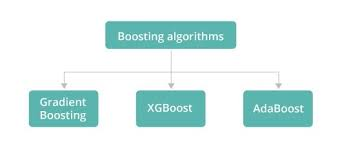

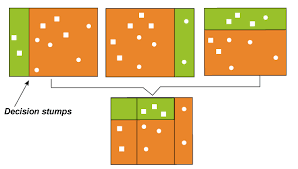